In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
% matplotlib inline

In [ ]:
# sheet_name = "crack_detection"
# url = f"https://docs.google.com/spreadsheets/d/12bgG2x16KMahiv3e5S_FA5mz9qO5ZaYpUaiDKCVUk9Q/edit#gid=2142103626={sheet_name}"

# data = pd.read_csv(url)
data = pd.read_csv('/content/drive/MyDrive/crack_detection.csv')

In [ ]:
data

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1:].values

In [ ]:
print([X.shape,Y.shape])

[(700, 24), (700, 1)]


In [ ]:
def normalize(X):
  return (X - np.mean(X,axis = 0))/np.std(X,axis = 0)

In [ ]:
X = normalize(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print([X_val.shape,X_test.shape])

[(140, 24), (140, 24)]


In [ ]:
print([X_train.shape,X_test.shape])

[(420, 24), (140, 24)]


In [ ]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

In [ ]:
def forward(X,W,b):
  y = sigmoid(np.dot(X,W)+b)
  return y

In [ ]:
def predict(X,W,b):
  predicted = sigmoid(np.dot(X,W)+b)
  y = np.where(predicted>0.5,1,0)
  return y

In [ ]:
def costFunct(y,y_hat):
  l = -np.mean(np.log(y_hat)*y + np.log(1-y_hat)*(1-y))
  return l

In [ ]:
def gradient(X,Y,W,b):
  m = X.shape[0]
  y_hat = np.expand_dims(forward(X,W,b),axis =1)
  dw = ((1/m)*np.dot(X.T, (y_hat - Y))).squeeze()
  db = (1/m)*(np.sum((y_hat - Y)))
  return dw,db

**Training function**:

In [ ]:
def BinarylogRegClassifier(X,Y,num_iter,learning_rate=0.02):
  m,n = X.shape
  W = np.random.random((n))
  b = np.random.random(1)
  losses = []

  for i in range(num_iter):
    Y_hat = forward(X,W,b)
    losses.append([i,costFunct(Y,Y_hat)])
    dw,db = gradient(X,Y,W,b)
    W -= learning_rate*dw
    b -= learning_rate*db

  return losses,W,b

**Training process**:

In [ ]:
losses,W,b = BinarylogRegClassifier(X_train,y_train,1000) #Training with 1000 epochs

In [ ]:
losses = np.asarray(losses)

In [ ]:
losses

In [ ]:
epochs = losses[:,0]
loss = losses[:,1]

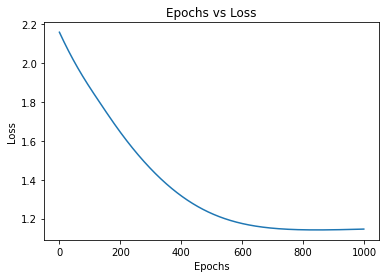

In [ ]:
plt.plot(epochs,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.show()

In [ ]:
def accuracyCalculator(y,y_hat):
  summ = 0
  for i in range(len(y)):
    if(y[i]==y_hat[i]):
      summ += 1
  accuracy = summ/len(y)
  return accuracy

In [ ]:
predictions_train = predict(X_train,W,b)

In [ ]:
predictions_testset = predict(X_test,W,b)

In [ ]:
predictions_val = predict(X_val,W,b)

In [ ]:
predictions_train

In [ ]:
predictions_testset

In [ ]:
predictions_val

In [ ]:
accuracyCalculator(y_train,predictions_train)

0.7857142857142857

In [ ]:
accuracyCalculator(y_test,predictions_testset)

0.8071428571428572

In [ ]:
accuracyCalculator(y_val,predictions_val)

0.8142857142857143

In [ ]:
import sklearn.metrics

**f1 Scores**:

In [ ]:
sklearn.metrics.f1_score(y_train, predictions_train) #f1 score for train set

0.7999999999999999

In [ ]:
sklearn.metrics.f1_score(y_test, predictions_testset) #f1 score for test set

0.823529411764706

In [ ]:
sklearn.metrics.f1_score(y_val, predictions_val)#f1 score for validation set

0.8194444444444444